## Employee Attrition Dataset

__Employee Attrition__ is the reduction of staff by voluntary or involuntary reasons. These can be through natural means like retirement, or it can be through resignation, termination of contract, or when a company decides to make a position redundant

__About the Dataset__ :

This dataset is about 1470 rows and 35 attributes which consist of 8 categorical variables and 26 numerical variables and the target label for the data set is "attrition". 

It uncovers the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

This dataset is a fictional dataset created by IBM Data Scientists. Although Employee Attrition can occurred due to voluntary or involuntary reasons, in this project I'm using __assumption that attrition occurred from internal/voluntary motives__. Since the objective of building the model is to classify the characteristics of employee who will do attrition.

source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

_Further Information_ :

According to the Consumer Finance Protection Bureau, __3 factors__ that lead to attrition are:

    - Financial Stress
    - Stagnancy
    - Dissatisfaction with Job Parameters

Specifically, the economic studies we examined reveal a number of patterns about the cost of replacing an employee:

• For all positions except executives and physicians—jobs that require very specific skills—across the remaining 27 case studies, the typical (median) cost of turnover was 21 percent of an employee’s annual salary.

• For workers earning less than 50,000 USD annually—which covers three-quarters of all workers in the United States—the 22 case studies show a typical cost of turnover of 20 percent of salary, the same as across positions earning $75,000 a year or less, which includes 9 in 10 U.S. workers

• Among positions earning 30,000 USD or less, which includes more than half of all U.S. workers, the cost of replacing an employee is slightly less than among positions earning less than $75,000 annually. The typical cost of turnover for positions earning less than 30,000 USD annually is 16 percent of an employee’s annual salary.

__Additional Note__: 

Since the results from the model will be categorical ("Yes" or "No"), we are looking for model with the highest recall and fair amount of precisions. One thing to be considered is the target we're looking for depending on the economic consideration, since to make an employee stays the companies might have to invest more to maintain a certain important features in a high value. Since the economic considerations could not be simulated due to the lack of data, in this project I will be aiming for __high recall of Attrition__.

### __1. Data Understandings & Processing__

The first step in building the model is to importing Libraries and understanding features within the unprocessed dataset.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# from Function import conditional_entropy, theils_u, convert, correlation_ratio

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./Files/HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [152]:
df.iloc[0]

Age                                      41
Attrition                                 1
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
OverTime                                  1
PercentSalaryHike                        11
PerformanceRating                         3
RelationshipSatisfaction        

In [6]:
df.shape

(1470, 35)

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dataframe consisted of 1470 rows and 35 features. And not all of the features are numbers, therefore, we must convert it into number so that the model would work. Thankfully, there are no NaN values.

In [7]:
# df.describe().T

Attrition and Overtime consisted of a Yes No value, thus it is manually renamed to ease the process on the latter stages.

In [8]:
df['Attrition'] = df['Attrition'].apply(lambda val: 1 if val=='Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda val: 1 if val=='Yes' else 0)

In [9]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype,
                   df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100, 2),
                   df[col].nunique(), list(df[col].unique()[:2])]);

empDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

In [10]:
empDesc[empDesc['unique'] <=1]

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
8,EmployeeCount,int64,0,0.0,1,[1]
21,Over18,object,0,0.0,1,[Y]
26,StandardHours,int64,0,0.0,1,[80]


In [12]:
df.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

 _Comment_ :

These three features each only have 1 unique value, therefore there is no variance and decided to drop it.

EmployeeNumber is just the ID of employee, thus slightly similar to index which is ordinal values. 
Therefore, it is also dropped to prevent miscalculations of the model.

In [13]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

Next, we see further deeper into the dataframe metadatas.

In [17]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype,
                   df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) *100, 2),
                   df[col].nunique(), list(df[col].unique()[:5])]);

empDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)

print('\n \t \t Employee Attrition Dataframe Information (Edited)\n\n')
empDesc


 	 	 Employee Attrition Dataframe Information (Edited)




,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,43,"[41, 49, 37, 33, 27]"
1,Attrition,int64,0,0.0,2,"[1, 0]"
2,BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,int64,0,0.0,886,"[1102, 279, 1373, 1392, 591]"
4,Department,object,0,0.0,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,int64,0,0.0,29,"[1, 8, 2, 3, 24]"
6,Education,int64,0,0.0,5,"[2, 1, 4, 3, 5]"
7,EducationField,object,0,0.0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EnvironmentSatisfaction,int64,0,0.0,4,"[2, 3, 4, 1]"
9,Gender,object,0,0.0,2,"[Female, Male]"


In [22]:
empDesc[empDesc['dataType'] != "int64"]

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
2,BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
4,Department,object,0,0.0,3,"[Sales, Research & Development, Human Resources]"
7,EducationField,object,0,0.0,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
9,Gender,object,0,0.0,2,"[Female, Male]"
13,JobRole,object,0,0.0,9,"[Sales Executive, Research Scientist, Laborato..."
15,MaritalStatus,object,0,0.0,3,"[Single, Married, Divorced]"


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


The highest standard deviations could be found in MonthlyRate, MonthlyIncome, and DailyRate in order. These features would have high variance, due to the position an employee currently in as well as the specialization, and other certain features that would simulateneously affect the rate they receive, which will be investigated more in EDA later.

There are 6 remaining features with object data, thus the feature names are collected on a list to be encoded later on.

In [23]:
catCol = [i for i in df if df[i].dtype!='int64' ]
numCol = [i for i in df if df[i].dtype=='int64' ]

In [24]:
catCol #categorical columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [25]:
print(df.columns) #Index Data
print(len(df.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
31


In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### __2. Exploratory Data Analysis (EDA)__ 

During this part, I analyze more into the correlation of features; mainly by using plots. Furthermore, determining which features to be used further into the model development.

#### a. Attrition

Since the primary objective of the model developed will be to classify the employee attrition, this feature will be used as the target.
There is an imbalanced data distribution in Attrition column, with the ratio of almost 1:6. 

This imbalance will affect the model, since the learning dataset will have more amount of '0' Attrition; the model will be more familiar in categorizing the characteristics of data that would not do Attrition.

In [28]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

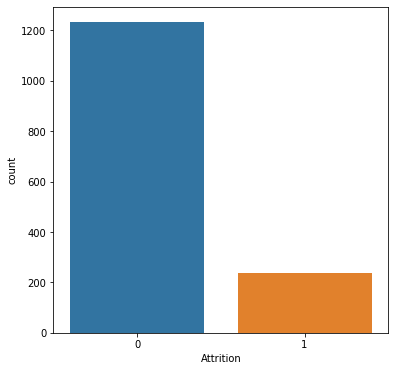

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(df['Attrition'])

#### b. Gender

Let's see if Gender also plays an important role in Attrition.

In [35]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

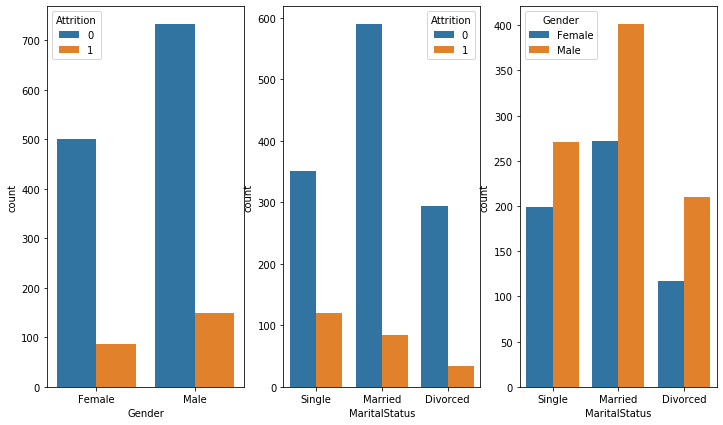

In [30]:
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
sns.countplot(df['Gender'], hue=df['Attrition'])

plt.subplot(1,3,2)
sns.countplot(df['MaritalStatus'], hue=df['Attrition'])

plt.subplot(1,3,3)
sns.countplot(df['MaritalStatus'], hue=df['Gender'])

In [34]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  0            501
        1             87
Male    0            732
        1            150
Name: Attrition, dtype: int64

In [31]:
df.groupby('Gender')['Attrition'].mean()

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

Around 14.7% of female tends to do Attrition, whereas for male-gendered has a higher value which is 17%. Overall, in the company there are more male than female with a difference of 294.

In [124]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [36]:
df.groupby('MaritalStatus')['Attrition'].mean()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
Name: Attrition, dtype: float64

In [127]:
df.groupby(['Gender', 'MaritalStatus']).count()['Department']

Gender  MaritalStatus
Female  Divorced         117
        Married          272
        Single           199
Male    Divorced         210
        Married          401
        Single           271
Name: Department, dtype: int64

In [43]:
df.groupby(['Gender', 'MaritalStatus'])['YearsAtCompany'].max()

Gender  MaritalStatus
Female  Divorced         27
        Married          40
        Single           24
Male    Divorced         33
        Married          36
        Single           37
Name: YearsAtCompany, dtype: int64

In [42]:
df.groupby(['Gender', 'MaritalStatus'])['YearsAtCompany'].mean()

Gender  MaritalStatus
Female  Divorced         7.555556
        Married          7.757353
        Single           6.321608
Male    Divorced         7.161905
        Married          7.002494
        Single           6.413284
Name: YearsAtCompany, dtype: float64

__Comment__ :

Between Male and Female gender, Male has more tendency to attrite than female.

Marital status also plays a role with those with Single status have higher counts than Married/Divorced. The Divorced employees have the lowest number, maybe due to not being in a relationship anymore, they become more committed into the work. Single employees tends to attrite the most, since they don't have as much responsibility as the others.

Also, in the female gender, the single employees has the lowest maximum YearsAtCompany, followed by Divorced, and lastly Married. An anomaly is found in Male-gendered employees, where the longest YearsAtCompany is had by the Single, followed by Married, and the least is Divorced. However, when I check the mean of each, the shortest YearsAtCompany in both Male and Female are found in the "Single" MaritalStatus.

Most employees in the dataset are married, and overall there are more male than female in this company.




#### c. Age and Education

Next, we will check the correlation of Age and Education of employees towards the Attrition Tendency.

Range of Age starts from 18 and maximum is 60 with the mean of 36.92, whereas Education is a number value.

The number 1 is 'Below College', 2 for 'College', 3 for 'Bachelor', 4 for 'Master' and 5 for 'Doctor'.

In [45]:
empDesc.iloc[[0, 6]]

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Age,int64,0,0.0,43,"[41, 49, 37, 33, 27]"
6,Education,int64,0,0.0,5,"[2, 1, 4, 3, 5]"


In [51]:
df.describe().T.iloc[[0,4]]

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0


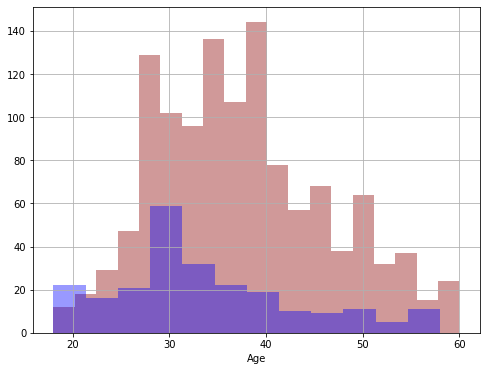

In [21]:
plt.figure(figsize=(8,6))

sns.distplot(df[df['Attrition'] == 0]['Age'], kde=False, color='darkred')
sns.distplot(df[df['Attrition'] == 1]['Age'], kde=False, color='blue')
# plt.legend()
plt.grid(True)
plt.show()

The employees ranging from 20 years old up to 60 years old, but mostly 26-ish up to almost 40.

Most employees that attrited are in their 28-35 years old (Blue colour).

Let's see the distribution of the employees with respect to Education.

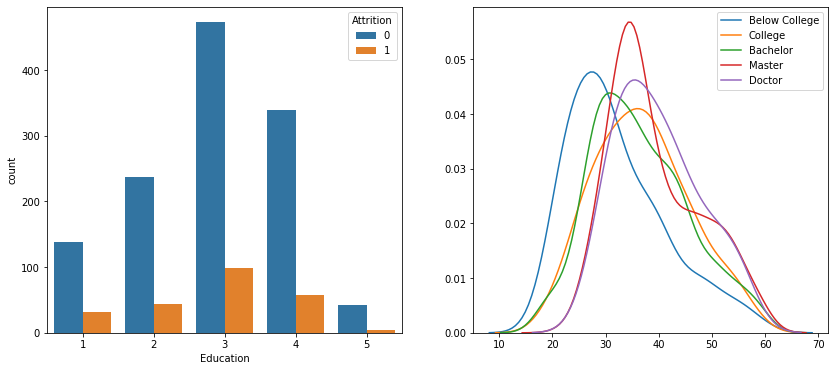

In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.countplot(df['Education'], hue=df['Attrition'])

plt.subplot(1,2,2)
sns.kdeplot(df[df['Education'] == 1]['Age'], label='Below College')
sns.kdeplot(df[df['Education'] == 2]['Age'], label='College')
sns.kdeplot(df[df['Education'] == 3]['Age'], label='Bachelor')
sns.kdeplot(df[df['Education'] == 4]['Age'], label='Master')
sns.kdeplot(df[df['Education'] == 5]['Age'], label='Doctor')

In [128]:
df.groupby('Education')['Attrition'].mean()

Education
1    0.182353
2    0.156028
3    0.173077
4    0.145729
5    0.104167
Name: Attrition, dtype: float64

Distribution of employees' education has the highest value in '3 - Bachelor', and the lowest in '5-Doctor'. However, in terms of Attrition; Employees with Education of '1 - Below College' attrites the most with the value of 18.23% of the population. Followed by '3 - Bachelor' which is 17.3%. The least to attrites are the '5 - Doctor' which makes sense since the higher the education the least tendency of people to quit their job due to Age.

The age range for Bachelor Educated Employees ranging from 20s up to 60s, while the Master Educated has the highest range in 30-50.

In conclusion, most of the employees that attrited have education of Bachelor, followed by Master, College, Below College and Doctor.

Now, let's check the Education Field.

In [24]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

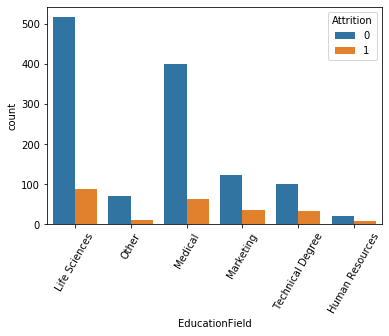

In [25]:
sns.countplot(df['EducationField'], hue=df['Attrition'])
plt.xticks(rotation=60)

In [129]:
df.groupby('EducationField')['Attrition'].mean()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
Name: Attrition, dtype: float64

EducationField that did attrition most often is in Human Resources (25.9%), Technical Degree (24.24%) and Marketing (22%).

'Other' EducationField has the lowest value for the attrition, which makes up 13.4%.

This might be due to the Job Role and Time Spent in the job for those 3 EducationFields, which will be investigated more later on.

__d. Department, Job Role__

In [26]:
print('Department :\n', df['Department'].unique())
print('JobRole :\n', df['JobRole'].unique())

Department :
 ['Sales' 'Research & Development' 'Human Resources']
JobRole :
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [27]:
departdf = pd.DataFrame(df['Department'].value_counts())
departdf['Percentage'] = departdf['Department'].apply(lambda i: round((i/len(df))*100,2))
departdf

,Department,Percentage
Research & Development,961,65.37
Sales,446,30.34
Human Resources,63,4.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

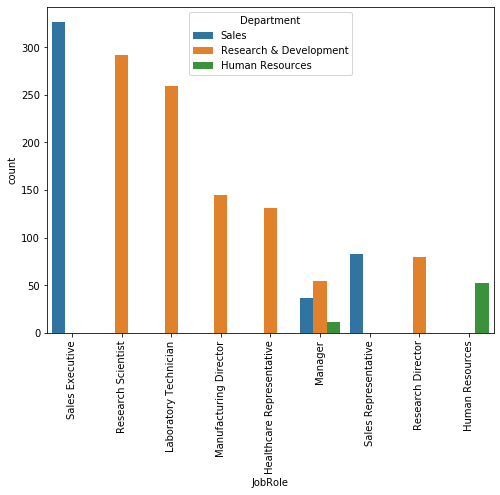

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(df['JobRole'], hue=df['Department'])
plt.xticks(rotation=90)

There are only three departments in the company. 

    Research & Development    961
    Sales                     446
    Human Resources            63

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

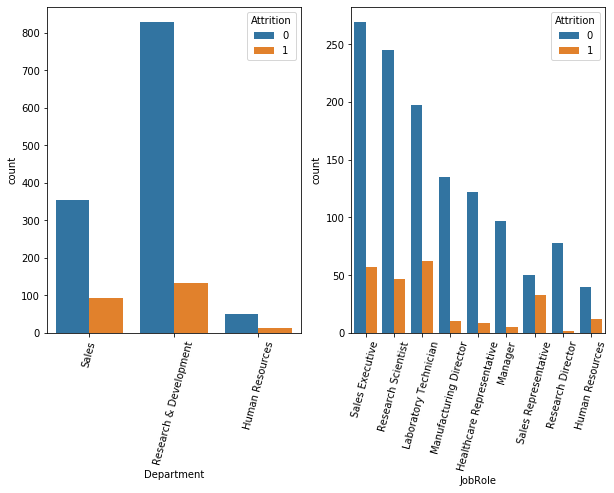

In [29]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(df['Department'], hue=df['Attrition'])
plt.xticks(rotation=75)

plt.subplot(1,2,2)
sns.countplot(df['JobRole'], hue=df['Attrition'])
plt.xticks(rotation=75)

Distribution of Attrited employees based on department, mostly in R&D and then followed by Sales Department, with Human Resources having the least which is less than 50 values. Maybe due to the total HR Department only 0.04 of the total Employees. While Research and Development has more than half value, and Sales Department 30% of the total values.

Based on the JobRole, most people who quits are worked as Laboratory Technician, Sales Executive, Research Scientist, and Sales Representative. The others don't have significant values comparing to those who stays. Research Director seems to have less Attrition comparing to the others.

__Income vs Job Role__

In [30]:
df.describe()['MonthlyIncome']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

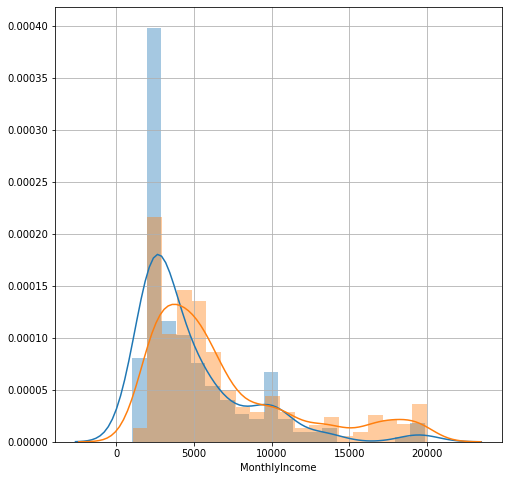

In [31]:
plt.figure(figsize=(8,8))
sns.distplot(df["MonthlyIncome"].where(df["Attrition"] ==1).dropna(), bins=20)
sns.distplot(df["MonthlyIncome"].where(df["Attrition"] ==0).dropna(), bins=20)
plt.grid(True)

MonthlyIncome plays an important role in Attrition, from the range of 0 to 20000 of Income, Attrition occurs more often on 1000 to around 7500. Thus we can conclude that the low range of monthly Income plays an important role in Attrition.

Let's see the distribution in terms of Department and JobRoles.

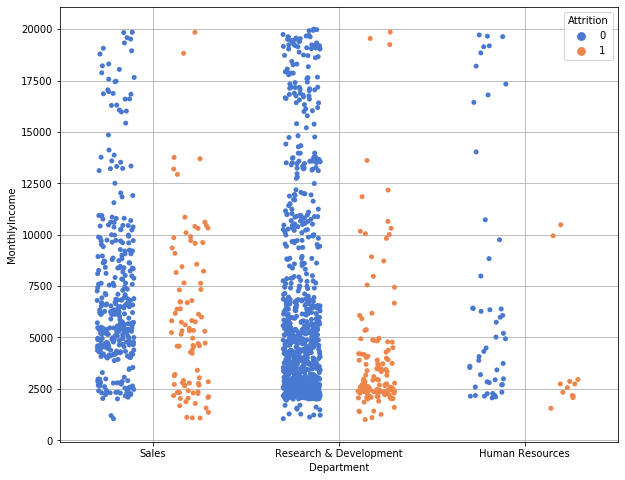

In [32]:
plt.figure(figsize=(10,8))

# plt.figure(figsize=(12,18))
# plt.subplot(2,1,1)
sns.stripplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df, jitter=0.2, palette="muted",
             dodge=True)
plt.grid(True)

# plt.subplot(2,1,2)

With the range of income from 1000 up to 19,999, it seems that the Sales Department are not paid evenly compare to their workload. 

Thus, from the plots above can be seen that the employee from Sales Department that Attrited ranging from the lowest up to the middle of MonthlyIncome distribution. For R&D and HR more often attrition occurred in low ranging income.

From here, we can conclude that income also affects the Attrition.

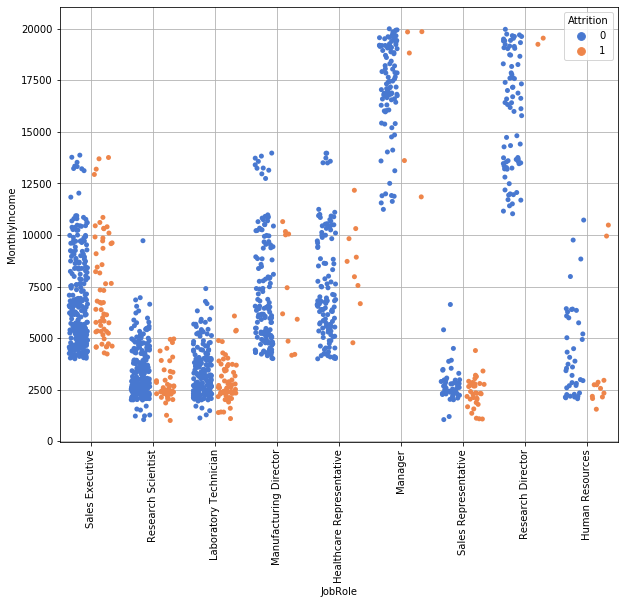

In [33]:
plt.figure(figsize=(10,8))
sns.stripplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df,
             palette='muted', jitter=0.30, dodge=True)

plt.xticks(rotation=90)
plt.grid(True)

From the plot above, most significant attrition can be seen in the jobrole of Sales Representative, Sales Executive, and Laboratory Technician.

After that followed by Research Scientist, Laboratory Technician and Human Resources. Which the monthly income can be considered low compare to the others.

For Manager and Research Director, almost can't be seen, and also their income are two of the most high ranging compare to the others.

From here we can conclude that MonthlyIncome play quite an important role to Attrition.

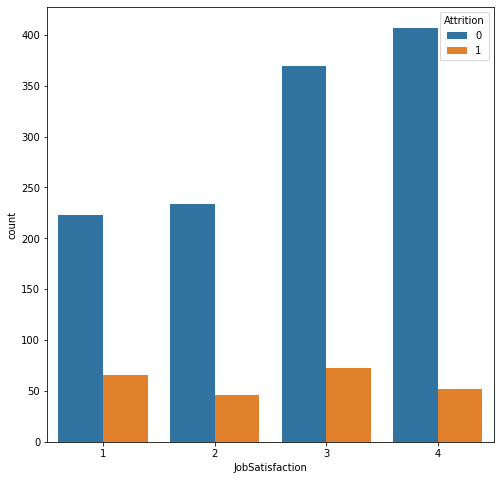

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(df['JobSatisfaction'], hue=df['Attrition'])

In [130]:
df.groupby('JobSatisfaction')['Attrition'].mean()

JobSatisfaction
1    0.228374
2    0.164286
3    0.165158
4    0.113290
Name: Attrition, dtype: float64

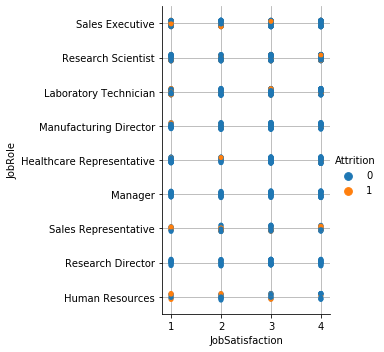

In [35]:
sns.catplot(x="JobSatisfaction", y="JobRole", hue="Attrition", data=dfb)
plt.grid(True)

Lowest job satisfaction who attrited mostly is done by Human Resources and SalesRepresentative. 
Also, Manufacturing Director and Sales Executive. 

Based on the countplot, there isn't any significant correlation between JobSatisfaction and Attrition. On all the range of JobSatisfaction, the amount of attrition employees are similar. The most highest ratio can be found in JobSatisfaction of 1, compare to the others.

__WorkLifeBalance__

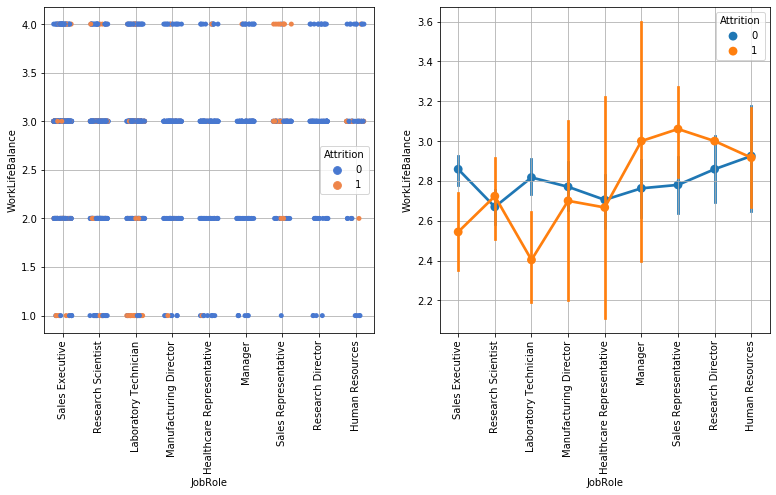

In [36]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.stripplot(x="JobRole", y="WorkLifeBalance", hue="Attrition", data=df, jitter=0.25, palette="muted")

plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(1,2,2)
sns.pointplot(x="JobRole", y="WorkLifeBalance", hue="Attrition", data=df)
plt.xticks(rotation=90)
plt.grid(True)

Attrition seem to occur the most in Laboratory Technician which has WorkLifeBalance value of 1.0 and Sales Representative who have WLB of 4.0.
Also SalesExecutive who has WLB of 3.0.
The only jobrole which has quite high work life balance ~3.0 but still attrited are Manager and Research Director.

Perhaps there is no significant correlation between WLB and Attrition.

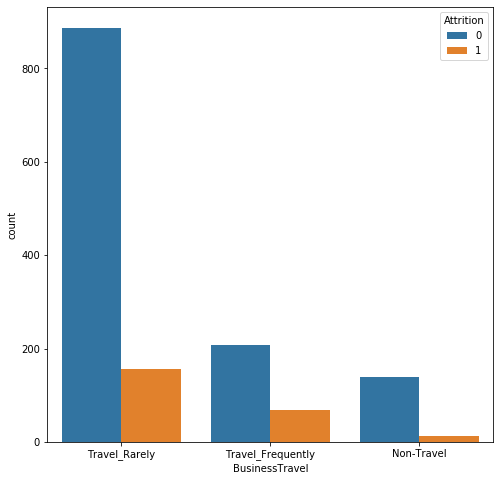

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(df['BusinessTravel'], hue=df['Attrition'])

The frequency of travel also plays a role in Attrition. There seems to be more attrition in the employees who travel rarely. Perhaps the situation of being rarely traveling adds further stress on an employee.

In [131]:
df.groupby('BusinessTravel')['JobRole'].value_counts()

BusinessTravel     JobRole                  
Non-Travel         Sales Executive               39
                   Laboratory Technician         28
                   Research Scientist            28
                   Healthcare Representative     15
                   Manufacturing Director        13
                   Manager                       12
                   Research Director              6
                   Sales Representative           5
                   Human Resources                4
Travel_Frequently  Sales Executive               59
                   Research Scientist            54
                   Laboratory Technician         51
                   Manufacturing Director        29
                   Healthcare Representative     26
                   Sales Representative          23
                   Manager                       13
                   Research Director             12
                   Human Resources               10
Travel_Rarely      

__Training Times LastYear__

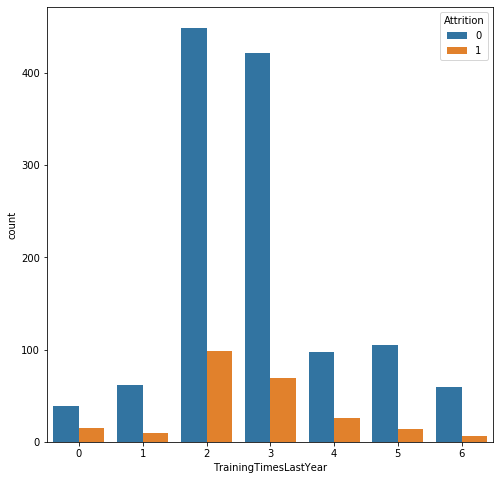

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(df['TrainingTimesLastYear'], hue=df['Attrition'])

In [133]:
df.groupby('TrainingTimesLastYear')['Attrition'].mean().sort_values()

TrainingTimesLastYear
6    0.092308
5    0.117647
1    0.126761
3    0.140530
2    0.179159
4    0.211382
0    0.277778
Name: Attrition, dtype: float64

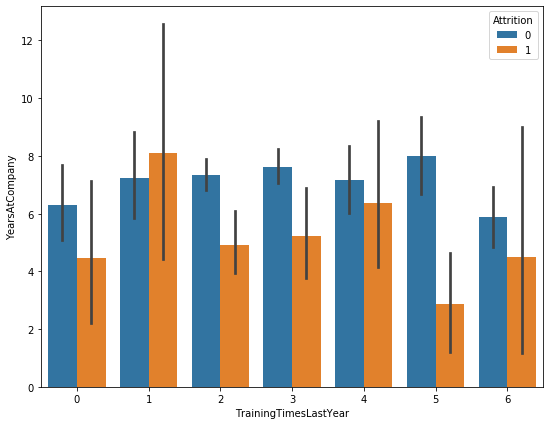

In [39]:
plt.figure(figsize=(9,7))
sns.barplot(df['TrainingTimesLastYear'], df['YearsAtCompany'], hue=df['Attrition'])

In [136]:
df[df['TrainingTimesLastYear'] == 6].groupby('Attrition')['YearsAtCompany'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,59.0,5.881356,3.978757,0.0,2.0,5.0,9.0,16.0
1,6.0,4.500000,5.958188,1.0,1.0,1.5,5.0,16.0


Overall, employees that have 1 time training last year but been in the company for a long time, tend to Attrite more than other. 

Perhaps due to the long duration of them being in the company, but only receives few training.

Also the employee who doesn't get any training.

When plotted TTLY vs Count, the most often employees attrite are when they have 2 and 3 training times last year.

But also the most loyal employees.

There seems to be quite a correlation between TrainingTimesLastYear and Attrition.

__Distance From Home__

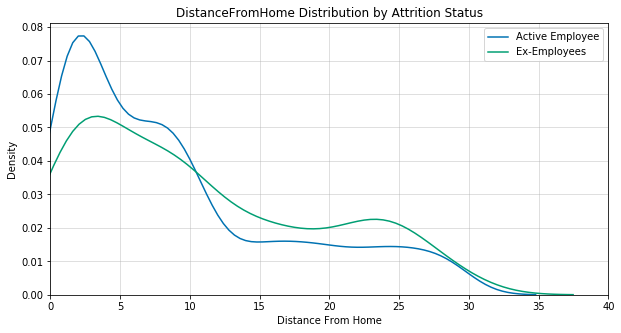

In [40]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df[df['Attrition'] == 0]['DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df[df['Attrition'] == 1]['DistanceFromHome'], label = 'Ex-Employees')
plt.xlim(left=0, right=40)
plt.xlabel('Distance From Home')
plt.ylabel('Density')
plt.title('DistanceFromHome Distribution by Attrition Status');

Seems like the employees that attrited distributed evenly ranging from the closest distance to the furthest distance.
The most employees that attrited are actually in distance ranging from 0 to 15 miles.

In [41]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

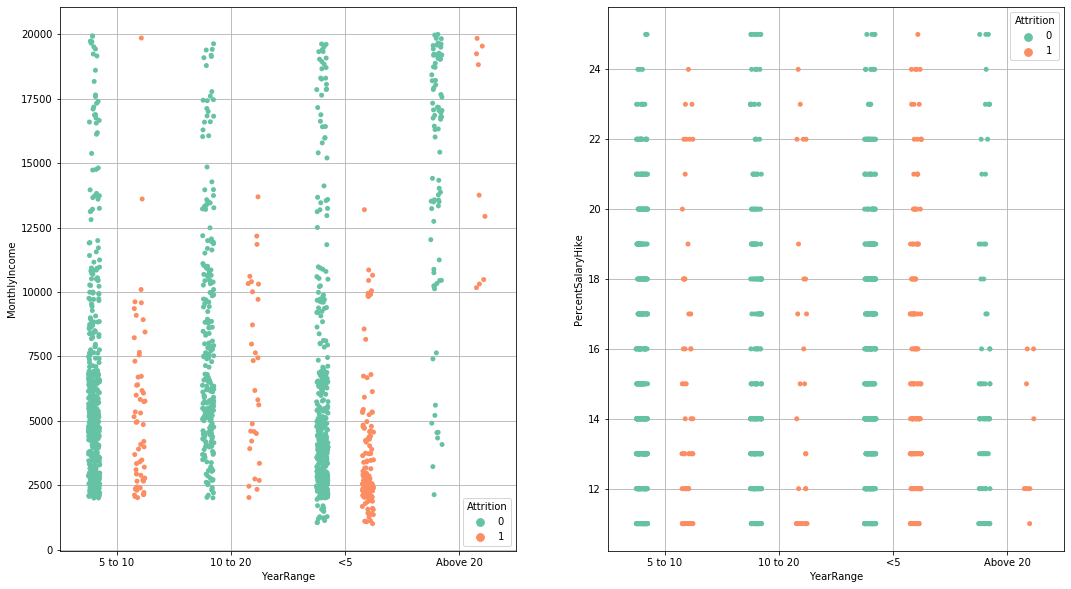

In [42]:
dfEdit = df.copy()
dfEdit['YearRange'] = df['YearsAtCompany'].apply(lambda i: "<5" if i <5 else(
    "5 to 10" if 5<=i<10 else(
    "10 to 20" if 10<=i<20 else
    "Above 20")))

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
sns.stripplot(x="YearRange", y="MonthlyIncome", hue="Attrition", data=dfEdit, palette="Set2", dodge=True)
plt.grid(True)

plt.subplot(1,2,2)
sns.stripplot(x="YearRange", y="PercentSalaryHike", hue="Attrition", data=dfEdit, palette="Set2", dodge=True)
plt.grid(True)

Most employees that attrited have been in the company for less than 5 years, or ranging from 5-10 years. 
10 to 20 years in company and above 20 years rarely do the employees attrited.

The most significant correlation we could see here is the low MonthlyIncome which pays quite a high affect to Attrition.

For the below 5 years in company and 5 to 10 company, there seems to be quite an evenly distributed PercentSalaryHike ranging from the lowest to the highest with the Attrition distributed evenly. 
Only employees above 20 seems to attrited due to the low PercentSalaryHike.

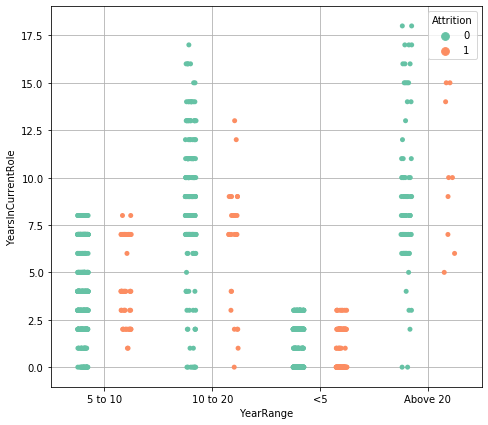

In [43]:
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.stripplot(x="YearRange", y="YearsInCurrentRole", hue="Attrition", data=dfEdit, palette="Set2", dodge=True)
plt.grid(True)


It seems like the most often Attrition occurred in employees working in CurrentRole for less than 3 years and have been working in the company for less than 3 years too. Also employees working for 5 to 10 years tend to attrite around 1 to 4 YearsInCurrentRole, or 6 to 8 Years.

For employees that worked for 10 to 20 years, they tend to attrite either in less than 5 years in current role, or 7-10 years.

Employees working for more than 20 years in the company, are less likely to attrite.

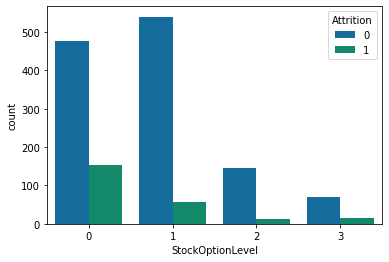

In [44]:
sns.countplot(df['StockOptionLevel'], hue=df['Attrition'])

In [137]:
df.groupby('StockOptionLevel')['Attrition'].mean()

StockOptionLevel
0    0.244057
1    0.093960
2    0.075949
3    0.176471
Name: Attrition, dtype: float64

Stock Option Level also plays a role in Attrition. Most people that attrite has 0 StockOptionLevel. And for StockOptionLevel of 1 only a few does attrite, which is around 32.3%. For the owner of StockOptionLevel 2 and 3 rarely do they attrite.

In [45]:
print(df[df['Attrition'] == 1]['StockOptionLevel'].value_counts())
print(df[df['Attrition'] == 0]['StockOptionLevel'].value_counts())

0    154
1     56
3     15
2     12
Name: StockOptionLevel, dtype: int64
1    540
0    477
2    146
3     70
Name: StockOptionLevel, dtype: int64


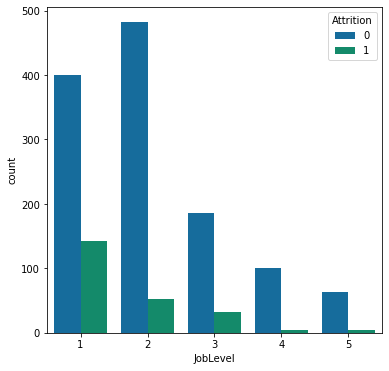

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(df['JobLevel'], hue=df['Attrition'])

In [139]:
df.groupby('JobLevel')['Attrition'].mean().sort_values()

JobLevel
4    0.047170
5    0.072464
2    0.097378
3    0.146789
1    0.263352
Name: Attrition, dtype: float64

Most employees that attrited are in JobLevel of 1, 2, or 3.
For the employees that are in JobLevel 4 and 5, rarely do they attrited.

__Correlation__

In [47]:
df[numCol].head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


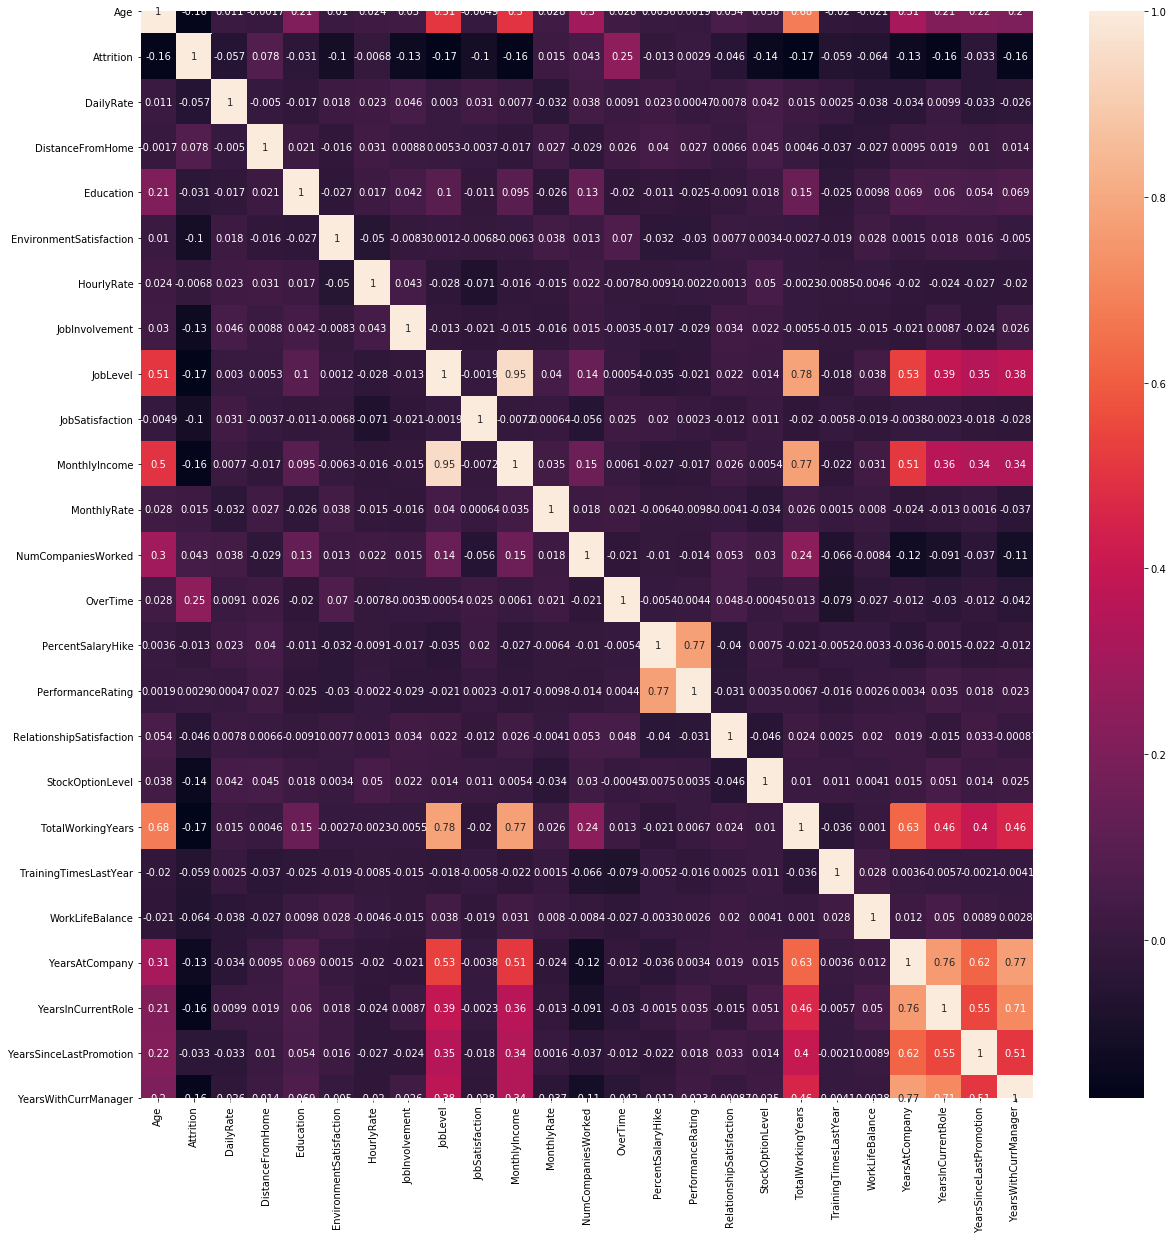

In [140]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numCol].corr(), annot=True)

In [49]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

__Correlation Ratio__

In [50]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

Text(0, 0.5, 'Parameter(s)')

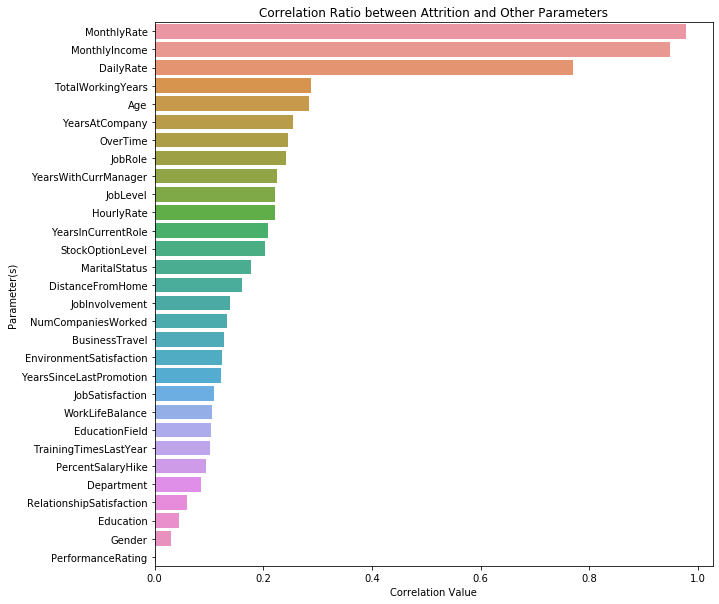

In [51]:
lis = []
for i in df.drop('Attrition', axis=1).columns:
    lis.append([i,correlation_ratio(df[i], df['Attrition'])])
lis = pd.DataFrame(lis).sort_values(1, ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(y=lis[0], x=lis[1])
plt.title('Correlation Ratio between Attrition and Other Parameters')
plt.xlabel('Correlation Value')
plt.ylabel('Parameter(s)')

__Theils U__

Note: you may need to restart the kernel to use updated packages.


In [52]:
# def theils_u(x, y):
#     s_xy = conditional_entropy(x,y)
#     x_counter = Counter(x)
#     total_occurrences = sum(x_counter.values())
#     p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
#     s_x = ss.entropy(p_x)
#     if s_x == 0:
#         return 1
#     else:
#         return (s_x - s_xy) / s_x

In [53]:
# lis2 = []
# for i in df.drop('Attrition', axis=1).columns:
#     lis = []
#     for j in df.drop('Attrition', axis=1).columns:
#         hasil = theils_u(df[i], df[j])
#         lis.append(hasil)
#     lis2.append(lis)

__Encoding__

In [54]:
catCol = [i for i in df if df[i].dtype != 'int64']
numCol = [i for i in df if df[i].dtype == 'int64']
catCol #catEnc

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [55]:
df[numCol]

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [56]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [57]:
dfLab = df.copy()

In [120]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [58]:
le_BusinessTravel = LabelEncoder()
le_Department = LabelEncoder()
le_EducationField = LabelEncoder()
le_Gender = LabelEncoder()
le_JobRole = LabelEncoder()
le_MaritalStatus = LabelEncoder()

le_BusinessTravel.fit(dfLab['BusinessTravel'])
le_Department.fit(dfLab['Department'])
le_EducationField.fit(dfLab['EducationField'])
le_Gender.fit(dfLab['Gender'])
le_JobRole.fit(dfLab['JobRole'])
le_MaritalStatus.fit(dfLab['MaritalStatus'])

# pickle.dump(le_BusinessTravel, open('le_BusinessTravel.pkl', 'wb'))
# pickle.dump(le_Department, open('le_Department.pkl', 'wb'))
# pickle.dump(le_EducationField, open('le_EducationField.pkl', 'wb'))
# pickle.dump(le_Gender, open('le_Gender.pkl', 'wb'))
# pickle.dump(le_JobRole, open('le_JobRole.pkl', 'wb'))
# pickle.dump(le_MaritalStatus, open('le_MaritalStatus.pkl', 'wb'))

dfLab['BusinessTravel'] = le_BusinessTravel.transform(dfLab['BusinessTravel'])
dfLab['Department'] = le_Department.transform(dfLab['Department'])
dfLab['EducationField'] = le_EducationField.transform(dfLab['EducationField'])
dfLab['Gender'] = le_Gender.transform(dfLab['Gender'])
dfLab['JobRole'] = le_JobRole.transform(dfLab['JobRole'])
dfLab['MaritalStatus'] = le_MaritalStatus.transform(dfLab['MaritalStatus'])

## 3. Machine Learning Modeling

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, log_loss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, recall_score, auc, log_loss, roc_auc_score, f1_score, matthews_corrcoef

In [61]:
def calc_train_error(X_train, y_train, model):
    # return in-sample error for already fit model
    
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    classreport = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'classreport' : classreport,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'recall' : recall,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    # return out of sample error for already fit model
    
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    classreport = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'classreport' : classreport,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'recall' : recall,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the classification metrics for in sample error and out of sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

__Checking Feature Importance__

From base condition. And preparing Train Test Split.

In [62]:
dfLab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1

In [63]:
target = dfLab['Attrition']
data = dfLab.drop('Attrition', axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

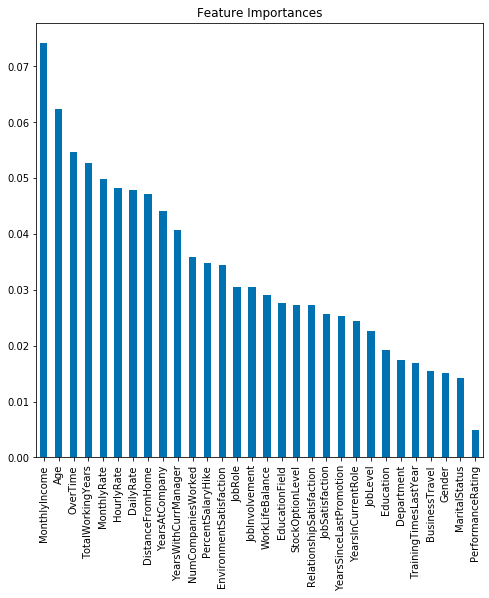

In [65]:
plt.figure(figsize=(8,8))

rfc = RandomForestClassifier()
rfc.fit(data, target)
coef1 = pd.Series(rfc.feature_importances_, data.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

### A. Testing Base Models

__a. Decision Tree Classifier, XGBoost, Random Forest__

In [84]:
baseDT = DecisionTreeClassifier()
baseDT.fit(X_train, y_train)
print('Decision Tree Classifier Score: ', baseDT.score(X_train, y_train))

baseXGB = XGBClassifier()
baseXGB.fit(X_train, y_train)
print('XGBoost Classifier Score: ', baseXGB.score(X_train, y_train))

baseRF = RandomForestClassifier()
baseRF.fit(X_train, y_train)
print('Random Forest Classifier Score: ', baseRF.score(X_train, y_train))

Decision Tree Classifier Score:  1.0
XGBoost Classifier Score:  0.963718820861678
Random Forest Classifier Score:  0.9863945578231292


In [85]:
predDT = baseDT.predict(X_test)
predProbDT = baseDT.predict_proba(X_test)[:,1]
print('Decision Tree Test Report')
print(classification_report(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print('\n')

predXGB = baseXGB.predict(X_test)
predProbXGB = baseXGB.predict_proba(X_test)[:, 1]
print('XGBoost Test Report')
print(classification_report(y_test, predXGB))
print(confusion_matrix(y_test, predXGB))
print('\n')

predRF = baseRF.predict(X_test)
predProbRF = baseRF.predict_proba(X_test)[:,1]
print('Random Forest Test Report')
print(classification_report(y_test, predRF))
print(confusion_matrix(y_test, predRF))

Decision Tree Test Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       491
           1       0.33      0.34      0.34        97

    accuracy                           0.78       588
   macro avg       0.60      0.60      0.60       588
weighted avg       0.78      0.78      0.78       588

[[424  67]
 [ 64  33]]


XGBoost Test Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       491
           1       0.67      0.27      0.38        97

    accuracy                           0.86       588
   macro avg       0.77      0.62      0.65       588
weighted avg       0.84      0.86      0.83       588

[[478  13]
 [ 71  26]]


Random Forest Test Report
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       491
           1       0.62      0.16      0.26        97

    accuracy                           0.85       588
   mac

In [86]:
print(baseRF.score(X_test, predDT))
print(baseXGB.score(X_test, predXGB))
print(baseRF.score(X_test, predRF))

0.8367346938775511
1.0
1.0


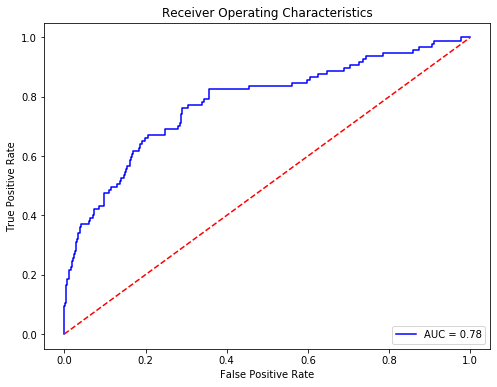

In [87]:
# calculate the fpr and tpr for all threshold of the classification

preds_X = predProbXGB
fpr, tpr, threshold = roc_curve(y_test, preds_X)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Grid Search CV

### A. Precision, Recall, ROC AUC
__Estimator = 'Precision'__

In [ ]:
RF1 = RandomForestClassifier(random_state=105)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=101)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 9}, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9493209340473778
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.96      0.19      0.32       491
           1       0.19      0.96      0.32        97

    accuracy                           0.32       588
   macro avg       0.57      0.58      0.32       588
weighted avg       0.83      0.32      0.32       588

[[ 95 396]
 [  4  93]]


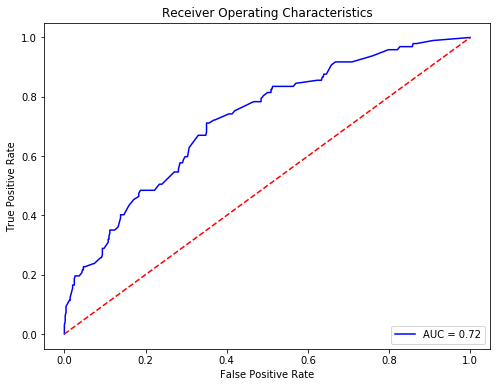

In [72]:
from sklearn.model_selection import GridSearchCV

searchRF1 = GridSearchCV(estimator = RF1,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF1.fit(feature1, target1)
print(searchRF1.best_params_)
print(searchRF1.best_score_)

test1pred = searchRF1.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test1pred))
print(confusion_matrix(y_test, test1pred))

predProbTest1 = searchRF1.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds1 = predProbTest1[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds1)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Estimator = __Precision__

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 15}, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       491
           1       0.17      1.00      0.28        97

    accuracy                           0.17       588
   macro avg       0.58      0.50      0.15       588
weighted avg       0.86      0.17      0.06       588

[[  3 488]
 [  0  97]]


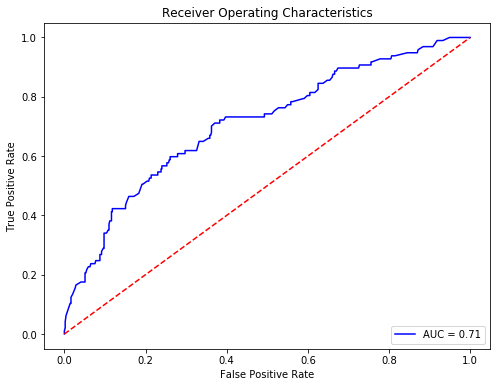

In [73]:

searchRF2 = GridSearchCV(estimator = RF1,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [
#                                {0:1, 1:2},{0:1, 1:5},
                            {0:1, 1:6}, {0:1, 1:9},
                           {0:1, 1:12}, {0:1, 1:15},
                            ]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF2.fit(feature1, target1)
print(searchRF2.best_params_)
print(searchRF2.best_score_)

test2pred = searchRF2.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test2pred))
print(confusion_matrix(y_test, test2pred))

predProbTest2 = searchRF2.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds2 = predProbTest2[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds2)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Estimator = __AUC Score__

{'class_weight': {0: 1, 1: 2}, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.759096146183066
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       491
           1       0.73      0.25      0.37        97

    accuracy                           0.86       588
   macro avg       0.80      0.61      0.65       588
weighted avg       0.85      0.86      0.83       588

[[482   9]
 [ 73  24]]


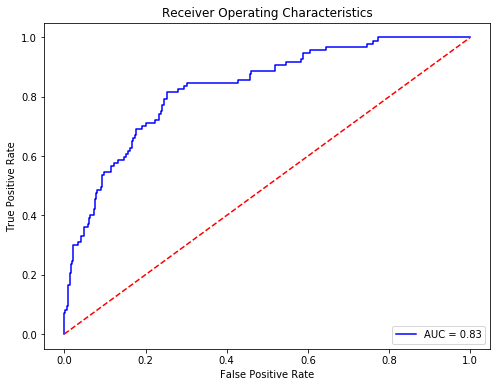

In [74]:

searchRF3 = GridSearchCV(estimator = RF1,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='roc_auc',
                       cv=5,
                       n_jobs = -1)

searchRF3.fit(feature1, target1)
print(searchRF3.best_params_)
print(searchRF3.best_score_)

test3pred = searchRF3.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test3pred))
print(confusion_matrix(y_test, test3pred))

predProbTest3 = searchRF3.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds3 = predProbTest3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds3)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***
### __B. Random Forest Refitting__
***

In [76]:
RF0 = RandomForestClassifier(random_state=105)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=101)


Accuracy:  0.8418367346938775
Recall:  0.15463917525773196
Train Results
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       742
           1       1.00      0.86      0.92       140

    accuracy                           0.98       882
   macro avg       0.99      0.93      0.95       882
weighted avg       0.98      0.98      0.98       882

Confusion Matrix: 
[[742   0]
 [ 20 120]]


Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       491
           1       0.58      0.15      0.24        97

    accuracy                           0.84       588
   macro avg       0.72      0.57      0.58       588
weighted avg       0.81      0.84      0.80       588

[[480  11]
 [ 82  15]]


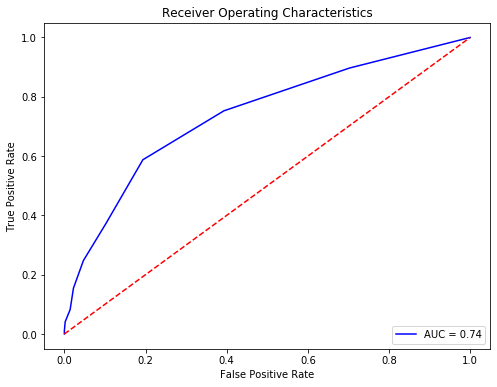

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=101)

RF0.fit(X_train,y_train)

#predict the results for train
train_pred = RF0.predict(X_train)

#predict the results for test
test_pred = RF0.predict(X_test)
#test the accuracy
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('Recall: ', recall_score(y_test, test_pred))

print('Train Results')
print(classification_report(y_train, train_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_train, train_pred))
print('\n')
print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))


predProbTest0 = RF0.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds0 = predProbTest0[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds0)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***********	
Precision Grid Search	
***********


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 9}, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4}
0.9197405557967868
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.94      0.28      0.43       491
           1       0.20      0.91      0.33        97

    accuracy                           0.38       588
   macro avg       0.57      0.59      0.38       588
weighted avg       0.82      0.38      0.41       588

[[137 354]
 [  9  88]]


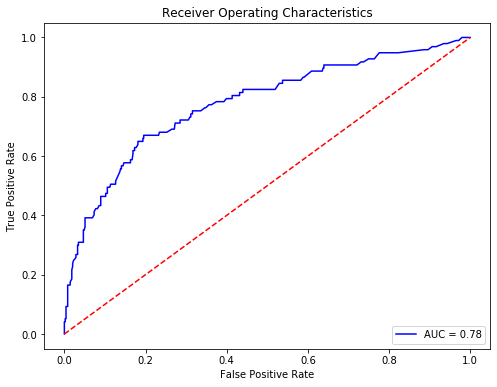

	***********
Recall Grid Search
***********


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 15}, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
1.0
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       1.00      0.05      0.10       491
           1       0.17      1.00      0.29        97

    accuracy                           0.21       588
   macro avg       0.59      0.53      0.20       588
weighted avg       0.86      0.21      0.13       588

[[ 25 466]
 [  0  97]]


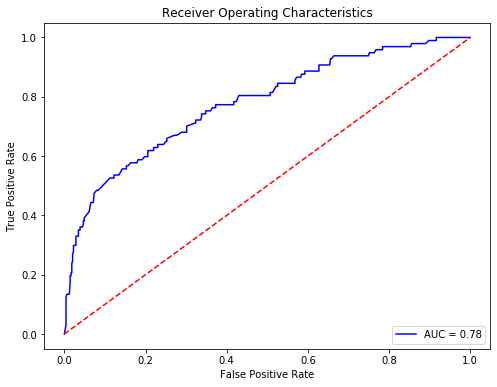

	***********
AUC Grid Search
***********
{'class_weight': {0: 1, 1: 2}, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.7883030683136203
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       491
           1       0.72      0.30      0.42        97

    accuracy                           0.87       588
   macro avg       0.80      0.64      0.67       588
weighted avg       0.85      0.87      0.84       588

[[480  11]
 [ 68  29]]


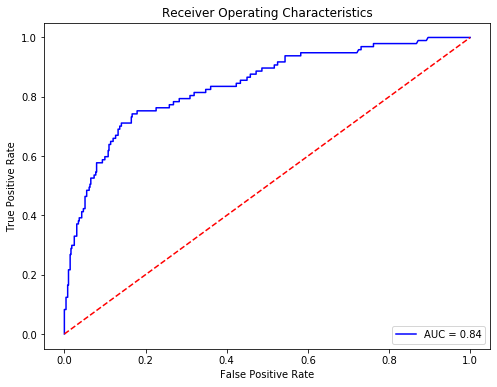

In [78]:
print('***********\t')
print('Precision Grid Search\t')
print('***********')
searchRF0A = GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF0A.fit(data, target)
print(searchRF0A.best_params_)
print(searchRF0A.best_score_)

test1pred = searchRF0A.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test1pred))
print(confusion_matrix(y_test, test1pred))

predProbTest1 = searchRF0A.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds0A = predProbTest1[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds0A)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('\t***********')
print('Recall Grid Search')
print('***********')

searchRF0B = GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [
#                                {0:1, 1:2},{0:1, 1:5},
                            {0:1, 1:6}, {0:1, 1:9},
                           {0:1, 1:12}, {0:1, 1:15},
                            ]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF0B.fit(data, target)
print(searchRF0B.best_params_)
print(searchRF0B.best_score_)

test2pred = searchRF0B.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test2pred))
print(confusion_matrix(y_test, test2pred))

predProbTest2 = searchRF0B.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds2 = predProbTest2[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds2)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('\t***********')
print('AUC Grid Search')
print('***********')


searchRF0C= GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='roc_auc',
                       cv=5,
                       n_jobs = -1)

searchRF0C.fit(data, target)
print(searchRF0C.best_params_)
print(searchRF0C.best_score_)

test3pred = searchRF0C.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test3pred))
print(confusion_matrix(y_test, test3pred))

predProbTest3 = searchRF0C.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds3 = predProbTest3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds3)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


***********	
Precision Grid Search	
***********


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 6}, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
1.0
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.90      0.02      0.04       491
           1       0.17      0.99      0.28        97

    accuracy                           0.18       588
   macro avg       0.53      0.50      0.16       588
weighted avg       0.78      0.18      0.08       588

[[  9 482]
 [  1  96]]


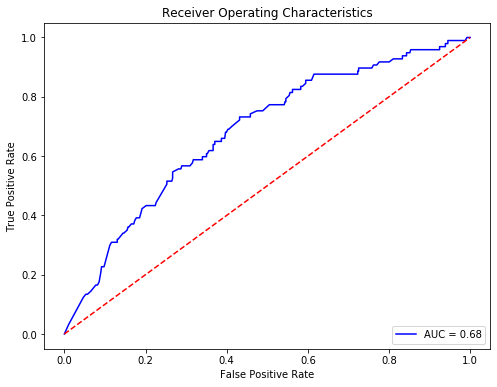

	***********
Recall Grid Search
***********


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 6}, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
1.0
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       491
           1       0.16      1.00      0.28        97

    accuracy                           0.16       588
   macro avg       0.08      0.50      0.14       588
weighted avg       0.03      0.16      0.05       588

[[  0 491]
 [  0  97]]


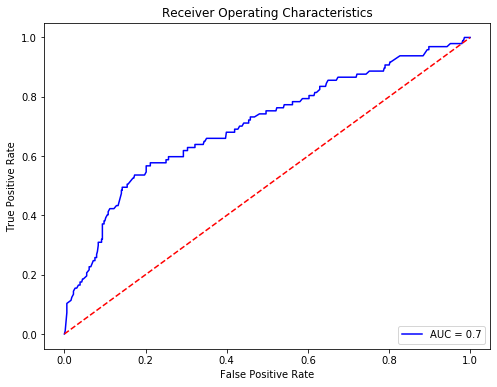

	***********
AUC Grid Search
***********


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 2}, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9503186966068441
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       491
           1       0.31      0.34      0.33        97

    accuracy                           0.77       588
   macro avg       0.59      0.60      0.59       588
weighted avg       0.78      0.77      0.77       588

[[418  73]
 [ 64  33]]


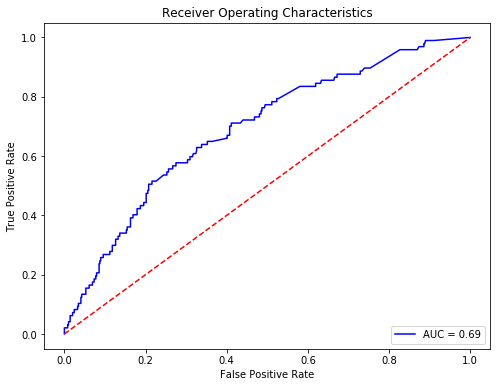

In [82]:
print('***********\t')
print('Precision Grid Search\t')
print('***********')
searchRF0A = GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF0A.fit(smote_train, smote_target)
print(searchRF0A.best_params_)
print(searchRF0A.best_score_)

test1pred = searchRF0A.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test1pred))
print(confusion_matrix(y_test, test1pred))

predProbTest1 = searchRF0A.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds0A = predProbTest1[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds0A)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('\t***********')
print('Recall Grid Search')
print('***********')

searchRF0B = GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [
#                                {0:1, 1:2},{0:1, 1:5},
                            {0:1, 1:6}, {0:1, 1:9},
                           {0:1, 1:12}, {0:1, 1:15},
                            ]
                       }, 
                     scoring='recall',
                       cv=5,
                       n_jobs = -1)

searchRF0B.fit(smote_train, smote_target)
print(searchRF0B.best_params_)
print(searchRF0B.best_score_)

test2pred = searchRF0B.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test2pred))
print(confusion_matrix(y_test, test2pred))

predProbTest2 = searchRF0B.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds2 = predProbTest2[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds2)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('\t***********')
print('AUC Grid Search')
print('***********')


searchRF0C= GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}]
                       }, 
                     scoring='roc_auc',
                       cv=5,
                       n_jobs = -1)

searchRF0C.fit(smote_train, smote_target)
print(searchRF0C.best_params_)
print(searchRF0C.best_score_)

test3pred = searchRF0C.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test3pred))
print(confusion_matrix(y_test, test3pred))

predProbTest3 = searchRF0C.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds3 = predProbTest3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds3)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [88]:
rocaucdf = pd.DataFrame(list(zip(tpr, fpr, threshold)),
                       columns=['TPR', 'FPR', 'Threshold'])
rocaucdf.tail(20)

,TPR,FPR,Threshold
112,0.907216,0.704684,0.035254
113,0.907216,0.725051,0.033378
114,0.917526,0.725051,0.033139
115,0.917526,0.735234,0.032787
116,0.927835,0.735234,0.032328
117,0.927835,0.743381,0.030331
118,0.938144,0.743381,0.030054
119,0.938144,0.786151,0.025459
120,0.948454,0.786151,0.025067
121,0.948454,0.859470,0.018130


### D. K-Fold Cross Validation

In [144]:
kf = KFold(n_splits=5, shuffle=True, random_state=101)

In [145]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_smot, y_smot = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    randForBaru = RandomForestClassifier(class_weight= {0: 1, 1: 6}, 
                                     max_depth= 10,
                                     min_samples_leaf=
                                     10, min_samples_split= 2,
                                    random_state=101)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, randForBaru)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['recall'], val['recall'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
listItem.append(list(np.mean(listItem, axis=0)))
    

dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Recall','Test Recall','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])
listIndex = list(dfReport.index)
listIndex[-1] = 'Average'
dfReport.index = listIndex

print('Base XGBoost Classifier')
dfReport

Base XGBoost Classifier


,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.812500,0.355556,0.942041,0.697546,0.818910,0.610427,0.647701,0.221168,0.372134,0.485453
1,0.848649,0.480769,0.946827,0.745510,0.817390,0.661284,0.651617,0.324173,0.356992,0.486618
2,0.846591,0.475410,0.947205,0.770844,0.819846,0.688559,0.655608,0.378313,0.349770,0.463794
3,0.864322,0.605263,0.943602,0.867290,0.825120,0.688770,0.667014,0.394996,0.399295,0.440671
4,0.806122,0.560976,0.944320,0.774318,0.801322,0.671255,0.616472,0.356480,0.379055,0.452761
Average,0.835637,0.495595,0.944799,0.771102,0.816518,0.664059,0.647683,0.335026,0.371449,0.465859


In [91]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_smot, y_smot = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, baseDT)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['recall'], val['recall'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
listItem.append(list(np.mean(listItem, axis=0)))
    

dfReport2 = pd.DataFrame(data=listItem, 
                        columns=['Train Recall','Test Recall','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])
listIndex = list(dfReport2.index)
listIndex[-1] = 'Average'
dfReport2.index = listIndex

print('Base Decision Tree')
dfReport2

Base Decision Tree


,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,1.0,0.428571,1.0,0.638889,1.0,0.620408,1.0,0.247537,9.992007e-16,7.283688
1,1.0,0.291667,1.0,0.564533,1.0,0.561123,1.0,0.123195,9.992007e-16,8.693434
2,1.0,0.520000,1.0,0.682131,1.0,0.662669,1.0,0.331620,9.992007e-16,7.283688
3,1.0,0.259259,1.0,0.567130,1.0,0.571429,1.0,0.145730,9.992007e-16,8.223518
4,1.0,0.423077,1.0,0.641291,1.0,0.637037,1.0,0.274581,9.992007e-16,7.518645
5,1.0,0.371429,1.0,0.623214,1.0,0.632091,1.0,0.271058,9.992007e-16,8.458476
6,1.0,0.304348,1.0,0.599755,1.0,0.605022,1.0,0.211408,9.992007e-16,6.813772
7,1.0,0.466667,1.0,0.650000,1.0,0.599091,1.0,0.228199,9.992007e-16,7.048730
8,1.0,0.285714,1.0,0.560150,1.0,0.537008,1.0,0.092551,9.992007e-16,7.518645
9,1.0,0.407407,1.0,0.637037,1.0,0.637037,1.0,0.274074,9.992007e-16,7.518645


Testing


{'class_weight': {0: 1, 1: 15}, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
1.0
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.97      0.06      0.11       491
           1       0.17      0.99      0.29        97

    accuracy                           0.21       588
   macro avg       0.57      0.52      0.20       588
weighted avg       0.83      0.21      0.14       588

[[  9 482]
 [  1  96]]


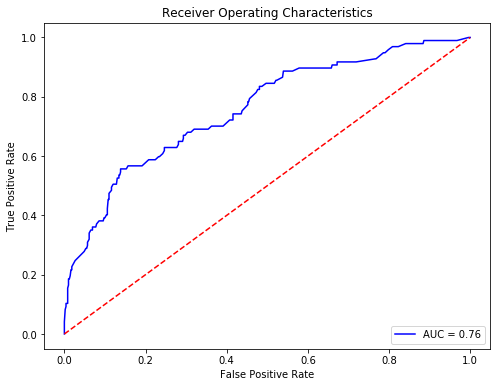

In [92]:
searchRF9 = GridSearchCV(estimator = RF0,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5, 10],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}, {0:1, 1:15}]
                       }, 
                     scoring=['recall', 'roc_auc'],
                    refit = 'recall',
                       cv=5,
                       n_jobs = -1)

searchRF9.fit(X_train, y_train)
print(searchRF9.best_params_)
print(searchRF9.best_score_)

test9pred = searchRF9.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test9pred))
print(confusion_matrix(y_test, test1pred))

predProbTest9 = searchRF9.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds9 = predProbTest9[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds9)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
RF_Z = RandomForestClassifier(random_state=101)

In [95]:
### ROC AUC GridSearchCV

searchRF10 = GridSearchCV(estimator = RF_Z,
                       param_grid = {
                           'max_depth' : [2, 4, 5, 10],
                           'min_samples_split' : [2, 4, 5, 10],
                           'min_samples_leaf' : [1, 2, 4, 5, 10],
                           'class_weight' : 
                           [{0:1, 1:2},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:9}, {0:1, 1:15}]
                       }, 
                     scoring=['recall', 'roc_auc'],
                    refit = 'roc_auc',
                       cv=5,
                       n_jobs = -1)

searchRF10.fit(X_train, y_train)
print(searchRF10.best_params_)
print(searchRF10.best_score_)

{'class_weight': {0: 1, 1: 5}, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7862229338770628


### __Model Chosen for Prediction is this one:__

Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       491
           1       0.63      0.80      0.71        97

    accuracy                           0.89       588
   macro avg       0.79      0.86      0.82       588
weighted avg       0.90      0.89      0.89       588

[[445  46]
 [ 19  78]]


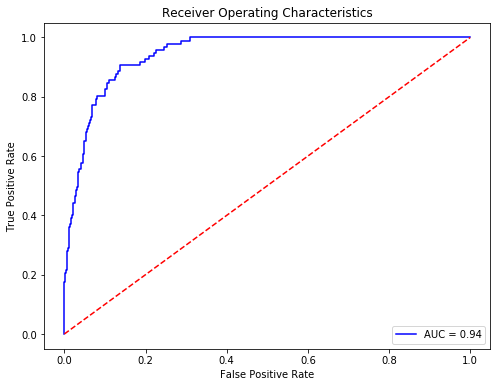

In [96]:
### Testing Baru

randForBaru = RandomForestClassifier(class_weight= {0: 1, 1: 6}, 
                                     max_depth= 10,
                                     min_samples_leaf=
                                     10, min_samples_split= 2,
                                    random_state=101)

randForBaru.fit(X_train,y_train)

test10pred = randForBaru.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test10pred))
print(confusion_matrix(y_test, test10pred))

predProbTest10 = randForBaru.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds10 = predProbTest10[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds10)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
RF0 = RandomForestClassifier(random_state=105)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': {0: 1, 1: 6}, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.781304807097187
Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       491
           1       0.89      0.93      0.91        97

    accuracy                           0.97       588
   macro avg       0.94      0.95      0.95       588
weighted avg       0.97      0.97      0.97       588

[[480  11]
 [  7  90]]


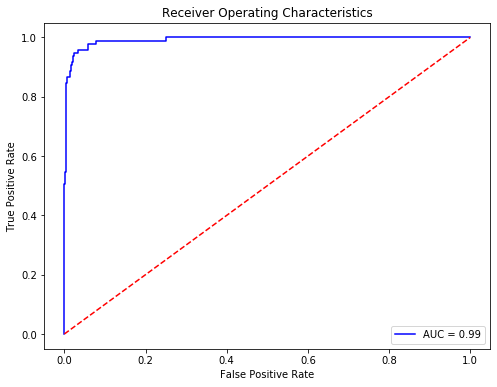

In [98]:
### Sebelumnya

### ROC AUC GridSearchCV

# searchRF10 = GridSearchCV(estimator = RF0,
#                        param_grid = {
#                            'max_depth' : [9, 10, 11, 12],
#                            'min_samples_split' : [2, 4, 5, 10],
#                            'min_samples_leaf' : [1, 2, 4, 5, 10],
#                            'class_weight' : 
#                            [{0:1, 1:5.85},{0:1, 1:5.9},{0:1, 1:5.95}, {0:1, 1:6}],
#                            'criterion' : ['gini', 'entropy']
#                        }, 
#                      scoring=['recall', 'roc_auc'],
#                     refit = 'roc_auc',
#                        cv=5,
#                        n_jobs = -1)


searchRF10.fit(X_train, y_train)
print(searchRF10.best_params_)
print(searchRF10.best_score_)

test10pred = searchRF10.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test10pred))
print(confusion_matrix(y_test, test10pred))

predProbTest10 = searchRF10.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds10 = predProbTest10[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds10)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
confusion_matrix(y_test, searchRF10.predict(X_test))

array([[480,  11],
       [  7,  90]])

In [112]:
# pickle.dump(searchRF10, open('modelRF10.pkl', 'wb'))

In [99]:
con = pd.DataFrame(data = confusion_matrix(y_test, test10pred), 
                   columns = ['P No', 'P Yes'], index=['A No', 'A Yes'])
con

,P No,P Yes
A No,480,11
A Yes,7,90


In [100]:
rocaucdf = pd.DataFrame(list(zip(tpr, fpr, threshold)),
                       columns=['TPR', 'FPR', 'Threshold'])

In [101]:
rocaucdf.iloc[55:70]

,TPR,FPR,Threshold
55,1.0,0.782077,0.073333
56,1.0,0.786151,0.073171
57,1.0,0.790224,0.072794
58,1.0,0.796334,0.071560
59,1.0,0.804481,0.066667
60,1.0,0.820774,0.064286
61,1.0,0.832994,0.063396
62,1.0,0.845214,0.054634
63,1.0,0.853360,0.054545
64,1.0,0.859470,0.050000


In [102]:
# prediction11 = [1 if i >= 0.414074 else 0 for i in preds10]
# print(classification_report(y_test, prediction11))
# print(confusion_matrix(y_test, test10pred))

### MODEL 

In [114]:
RF99 = RandomForestClassifier(random_state=105, 
                             class_weight= {0: 1, 1: 6},
                             criterion= 'gini',
                             max_depth= 10, 
                             min_samples_leaf= 2, 
                             min_samples_split= 10)


Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       491
           1       0.90      0.88      0.89        97

    accuracy                           0.96       588
   macro avg       0.94      0.93      0.93       588
weighted avg       0.96      0.96      0.96       588

[[482   9]
 [ 12  85]]


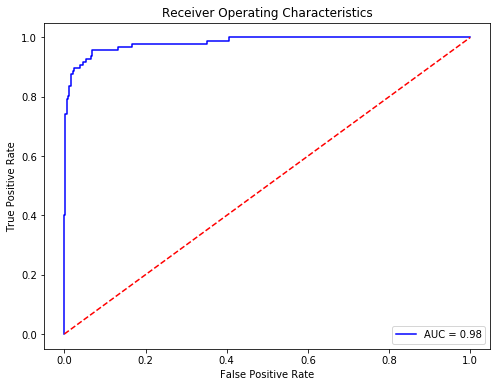

In [115]:
RF99.fit(X_train, y_train)
# print(searchRF10.best_params_)
# print(searchRF10.best_score_)

test99pred = RF99.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, test99pred))
print(confusion_matrix(y_test, test99pred))

predProbTest99 = RF99.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds99 = predProbTest99[:,1]
fpr99, tpr99, threshold99 = roc_curve(y_test, preds99)
roc_auc99 = auc(fpr99, tpr99)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr99, tpr99, 'b', label = 'AUC = {}'.format(round(roc_auc99, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rocaucdf = pd.DataFrame(list(zip(tpr99, fpr99, threshold99)),
                       columns=['TPR', 'FPR', 'Threshold'])

In [117]:
rocaucdf.tail(20)

,TPR,FPR,Threshold
62,1.0,0.837067,0.060285
63,1.0,0.849287,0.059341
64,1.0,0.857434,0.052941
65,1.0,0.865580,0.052174
66,1.0,0.867617,0.050799
67,1.0,0.871690,0.050000
68,1.0,0.879837,0.046154
69,1.0,0.887984,0.043902
70,1.0,0.892057,0.041379
71,1.0,0.898167,0.036522


__threshold__

In [103]:
prediction10 = [1 if i >= 0.499990 else 0 for i in preds10]
print(classification_report(y_test, prediction10))
print(confusion_matrix(y_test, prediction10))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       491
           1       0.89      0.93      0.91        97

    accuracy                           0.97       588
   macro avg       0.94      0.95      0.95       588
weighted avg       0.97      0.97      0.97       588

[[480  11]
 [  7  90]]


In [104]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_smot, y_smot = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    RF_tune = RandomForestClassifier(class_weight= {0: 1, 1: 5},
                                     max_depth = 10,
                                     min_samples_leaf=10,
                                     min_samples_split= 5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, RF_tune)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['recall'], val['recall'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
listItem.append(list(np.mean(listItem, axis=0)))
    

dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Recall','Test Recall','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])
listIndex = list(dfReport.index)
listIndex[-1] = 'Average'
dfReport.index = listIndex

dfReport

,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.805556,0.523810,0.945042,0.674981,0.809760,0.649555,0.630856,0.313164,0.360115,0.479201
1,0.807512,0.458333,0.951474,0.791328,0.837005,0.676321,0.679024,0.352642,0.351075,0.452465
2,0.792453,0.440000,0.944763,0.668852,0.809045,0.637037,0.627673,0.276105,0.354040,0.510980
3,0.780952,0.370370,0.959967,0.786111,0.848429,0.702400,0.697910,0.444591,0.337156,0.439347
4,0.791469,0.423077,0.942301,0.800381,0.817140,0.683435,0.641689,0.371206,0.341494,0.428599
5,0.782178,0.457143,0.954955,0.772959,0.847226,0.727959,0.695801,0.481834,0.333259,0.463856
6,0.785047,0.608696,0.947781,0.806802,0.820683,0.742857,0.647053,0.487415,0.354869,0.426210
7,0.801802,0.666667,0.945823,0.841919,0.825343,0.658110,0.657263,0.366757,0.363625,0.439466
8,0.793722,0.571429,0.945764,0.806122,0.804995,0.652756,0.620517,0.335496,0.360020,0.415770
9,0.771429,0.592593,0.949570,0.814506,0.818055,0.713740,0.640833,0.430930,0.345065,0.435809


### K-Fold Cross Validation

In [113]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_smot, y_smot = smot.fit_sample(X_train, y_train)
    
    #instantiate model
#     RF_tune = RandomForestClassifier(class_weight= {0: 1, 1: 5},
#                                      max_depth = 10,
#                                      min_samples_leaf=10,
#                                      min_samples_split= 5)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, searchRF10)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['recall'], val['recall'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
listItem.append(list(np.mean(listItem, axis=0)))
    

dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Recall','Test Recall','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])
listIndex = list(dfReport.index)
listIndex[-1] = 'Average'
dfReport.index = listIndex

dfReport

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
0,0.843750,0.511111,0.955009,0.756448,0.825798,0.692410,0.664616,0.385908,0.347390,0.562024
1,0.918919,0.250000,0.995604,0.701605,0.950397,0.612494,0.900798,0.253869,0.179848,0.758437
2,0.886364,0.196721,0.995358,0.757511,0.956705,0.589029,0.914672,0.248925,0.179066,0.535839
3,0.824121,0.631579,0.955782,0.822060,0.844564,0.720477,0.694324,0.452319,0.364393,0.438141
4,0.836735,0.536585,0.945221,0.767666,0.815346,0.669388,0.645606,0.348973,0.385442,0.454842
Average,0.861978,0.425199,0.969395,0.761058,0.878562,0.656759,0.764003,0.337999,0.291228,0.549857


In [105]:
### Tune ROC AUC
RF_tune10 = RandomForestClassifier(class_weight= {0: 1, 1: 6},
                                   max_depth= 10,
                                   min_samples_leaf=10,
                                   min_samples_split = 2)

RF_tune10.fit(X_train,y_train)

predTrain_RFT = RF_tune10.predict(X_train)
print(classification_report(y_train, predTrain_RFT))
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_train, predTrain_RFT))


predTest_RFT = RF_tune10.predict(X_test)
predProbTest_RFT = RF_tune10.predict_proba(X_test)

print(classification_report(y_test, predTest_RFT))
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predTest_RFT))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1113
           1       0.62      0.86      0.72       210

    accuracy                           0.89      1323
   macro avg       0.79      0.88      0.83      1323
weighted avg       0.91      0.89      0.90      1323


Confusion Matrix: 
[[1002  111]
 [  30  180]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       491
           1       0.61      0.85      0.71        97

    accuracy                           0.89       588
   macro avg       0.79      0.87      0.82       588
weighted avg       0.91      0.89      0.89       588


Confusion Matrix: 
[[439  52]
 [ 15  82]]


In [106]:
#### AMAN

### Tune ROC AUC


RF_tune11 = RandomForestClassifier(class_weight= {0: 1, 1: 6},
                                   max_depth= 10,
                                   min_samples_leaf=10,
                                   min_samples_split = 2)

RF_tune11.fit(X_train,y_train)

predTrain_RFT = RF_tune11.predict(X_train)
print(classification_report(y_train, predTrain_RFT))
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_train, predTrain_RFT))


predTest_RFT = RF_tune11.predict(X_test)
predProbTest_RFT = RF_tune10.predict_proba(X_test)

print(classification_report(y_test, predTest_RFT))
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predTest_RFT))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1113
           1       0.62      0.83      0.71       210

    accuracy                           0.89      1323
   macro avg       0.79      0.87      0.82      1323
weighted avg       0.91      0.89      0.90      1323


Confusion Matrix: 
[[1007  106]
 [  35  175]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       491
           1       0.62      0.81      0.71        97

    accuracy                           0.89       588
   macro avg       0.79      0.86      0.82       588
weighted avg       0.91      0.89      0.89       588


Confusion Matrix: 
[[443  48]
 [ 18  79]]


### SMOTE

In [79]:
oversampler=SMOTE(random_state=101)
smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [80]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
381,30,2,202,2,2,1,5,3,1,72,...,3,1,1,1,3,3,1,0,0,0
961,35,1,482,1,4,4,1,3,1,87,...,3,2,0,9,3,3,9,6,1,1
618,25,2,180,1,2,1,3,1,1,65,...,3,3,0,6,3,2,4,3,0,1
679,31,0,1188,2,20,2,2,4,0,45,...,3,4,1,9,2,2,9,8,0,0
570,52,0,715,1,19,4,3,4,1,41,...,3,1,1,5,3,3,4,3,1,2


In [81]:
smote_train.shape
smote_target.shape

(1484,)

Test Results
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.96      0.27      0.42       491
           1       0.20      0.95      0.34        97

    accuracy                           0.38       588
   macro avg       0.58      0.61      0.38       588
weighted avg       0.84      0.38      0.40       588

[[131 360]
 [  5  92]]


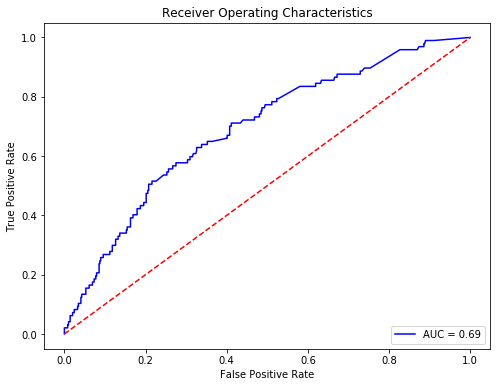

In [83]:
searchRFcZ = RandomForestClassifier(n_estimators=50, random_state=3, criterion='gini', 
                                 class_weight={0:1, 1:50}, min_samples_leaf=10)


searchRFcZ.fit(smote_train, smote_target)
# print(searchRFcZ.best_params_)
# print(RFcZ.best_score_)

testZpred = searchRFcZ.predict(X_test)

print('Test Results')
print('Confusion Matrix: ')
print(classification_report(y_test, testZpred))
print(confusion_matrix(y_test, testZpred))

predProbTestZ = searchRFcZ.predict_proba(X_test)

# calculate the fpr and tpr for all threshold of the classification

preds3 = predProbTest3[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds3)
roc_auc = auc(fpr, tpr)

## method 1 : plt
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Turns out SMOTE gives lower score. Therefore we used the GridSearch fitted models.

### K-Fold

In [107]:
kf = KFold(n_splits=5, shuffle=True, random_state=101)

train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Oversampling data train
#     ros = RandomOverSampler(random_state=101)
#     X_train, y_train = ros.fit_sample(X_train, y_train)
#     smot = SMOTE(random_state=101)
#     X_train, y_train = smot.fit_sample(X_train, y_train)
    
    #instantiate model
    RF_tune10 = RandomForestClassifier(class_weight= {0: 1, 1: 6},
                                   max_depth= 10,
                                   min_samples_leaf=10,
                                   min_samples_split = 2)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, RF_tune10)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
    
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'],
                    tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    
dfReport = pd.DataFrame(data=listItem, 
                        columns=['Train Accuracy','Test Accuracy','Train ROC AUC',
                                'Test ROC AUC','Train F1 Score','Test F1 Score',
                                'Train Matthews Corr Coef','Test Matthews Corr Coef',
                                'Train Log Loss', 'Test Log Loss'])

print(dfReport)

for i, tr in zip(range(1,6), train_errors):
    print('Report Train ke ' + str(i) + ' : ')
    print(tr['classreport'])

   Train Accuracy  Test Accuracy  Train ROC AUC  Test ROC AUC  Train F1 Score  \
0        0.895408       0.799320       0.949674      0.655332        0.832416   
1        0.900510       0.826531       0.954826      0.767959        0.838419   
2        0.880102       0.792517       0.946341      0.789559        0.799003   
3        0.872449       0.816327       0.943078      0.840049        0.803686   
4        0.881803       0.833333       0.948896      0.789935        0.816078   

   Test F1 Score  Train Matthews Corr Coef  Test Matthews Corr Coef  \
0       0.635795                  0.679465                 0.273359   
1       0.699850                  0.694745                 0.399739   
2       0.678665                  0.615677                 0.357613   
3       0.693750                  0.624628                 0.427351   
4       0.697525                  0.649731                 0.404830   

   Train Log Loss  Test Log Loss  
0        0.367520       0.504892  
1        0.36063

In [108]:
for i, val in zip(range(1,6), validation_errors):
    print('Report Validation ke ' + str(i) + ' : ')
    print(val['classreport'])

Report Validation ke 1 : 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       249
           1       0.37      0.42      0.39        45

    accuracy                           0.80       294
   macro avg       0.63      0.64      0.64       294
weighted avg       0.81      0.80      0.81       294

Report Validation ke 2 : 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       242
           1       0.51      0.50      0.50        52

    accuracy                           0.83       294
   macro avg       0.70      0.70      0.70       294
weighted avg       0.83      0.83      0.83       294

Report Validation ke 3 : 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       233
           1       0.50      0.48      0.49        61

    accuracy                           0.79       294
   macro avg       0.68      0.68      0.68       

In [109]:
log_loss(y_test, predProbTest_RFT)

0.3652971230334458